In [1]:
import math
import numpy as np
from lib import NesterovsLinearCoupling
from lib import SinkhornMethod
from lib import Experiments

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def coupling(C, p, q, gamma=0.1, eps=0.01, nesterovs=True, log=False):
    nlc = NesterovsLinearCoupling(gamma, n=p.shape[0], epsilon=eps, nesterovs=nesterovs, log=log)
    x, iterations_num = nlc.fit(C, p, q)
    return x, iterations_num, 0

def sinkhorn(C, p, q, gamma=0.1, eps=0.01, log=False):
    sm = SinkhornMethod(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, inner_iterations_num, outer_iterations_num = sm.fit(C, p, q, with_prox=False)
    return x, inner_iterations_num, outer_iterations_num

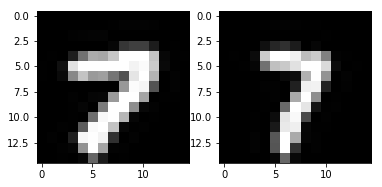

In [3]:
problems = []

for i in range(10, 16, 1):
    (C, p, q) = Experiments.load_data('test_data/1.png', 'test_data/2.png', show=i==15, size=i)
    problems.append((C, p, q))

In [4]:
x, inner_iterations_num, outer_iterations_num = sinkhorn(*problems[0], gamma=1, eps=0.01, log=True)

–––––––––––––––––––––––––––––
Algorithm configuration:
gamma = 1
eps = 0.01
eps prox = 0.001
–––––––––––––––––––––––––––––

Inner iteration 1: metric (one) = 0.049503 > 0.000397349607150862 or metric (two) = 0.116126 > 0.01
Inner iteration 2: metric (one) = 0.006073 > 0.0004283147208821539 or metric (two) = 0.001759 > 0.01
Inner iteration 3: metric (one) = 0.001392 > 0.0004297136756946235 or metric (two) = 5.4e-05 > 0.01
Inner iteration 4: metric (one) = 0.000482 > 0.0004299040445418949 or metric (two) = -9e-06 > 0.01
Inner iteration 5: metric (one) = 0.000219 > 0.00042993937147172036 or metric (two) = -9e-06 > 0.01
Inner iteration 5: metric (one) = 0.000219 < 0.00042993937147172036 and metric (two) = -9e-06 < 0.01


In [5]:
x, iterations_num, _ = coupling(*problems[0], gamma=1, eps=0.01, nesterovs=False, log=True)

–––––––––––––––––––––––––––––
Algorithm configuration:
gamma = 1
eps = 0.01
–––––––––––––––––––––––––––––

iteration 25:   criteria 1 = 0.0867149, criteria 2 = -2.860215
iteration 50:   criteria 1 = 0.0305447, criteria 2 = -2.4321283
iteration 75:   criteria 1 = 0.0148022, criteria 2 = -2.2400624
iteration 100:   criteria 1 = 0.0085243, criteria 2 = -2.1488933
iteration 125:   criteria 1 = 0.0055461, criteria 2 = -2.101736


In [6]:
x, iterations_num, _ = coupling(*problems[0], gamma=1, eps=0.01, nesterovs=True, log=True)

–––––––––––––––––––––––––––––
Algorithm configuration:
gamma = 1
eps = 0.01
–––––––––––––––––––––––––––––

iteration 25:   criteria 1 = 0.0278295, criteria 2 = -2.3873262
iteration 50:   criteria 1 = 0.0062606, criteria 2 = -2.1091198
iteration 75:   criteria 1 = 0.0035599, criteria 2 = -2.0660461
iteration 100:   criteria 1 = 0.0033856, criteria 2 = -2.0633174


In [ ]:
epsilon = 0.01
epsilons, gammas, iterations = Experiments.test([problems[0]], 
                                                config={'eps': (epsilon, epsilon, 1), 
                                                        'gamma': (1, 0.075, 1.5)},
                                                methods=[coupling, sinkhorn])

 71%|███████▏  | 10/14 [00:58<00:31,  7.97s/it]

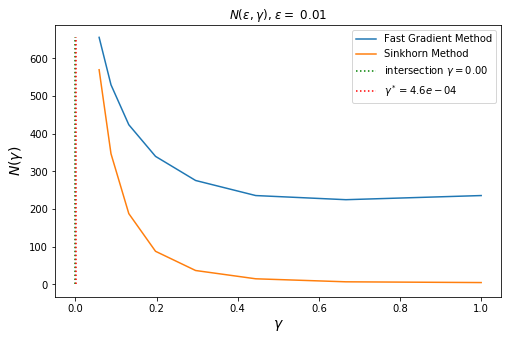

In [7]:
Experiments.plot_algorithm_comparation(gammas, iterations[:, :, 0], epsilon, p.shape[0], 
                                       methods_names=["Nesterov's Linear Coupling", "Sinkhorn Method"])

100%|██████████| 12/12 [05:09<00:00, 51.59s/it]


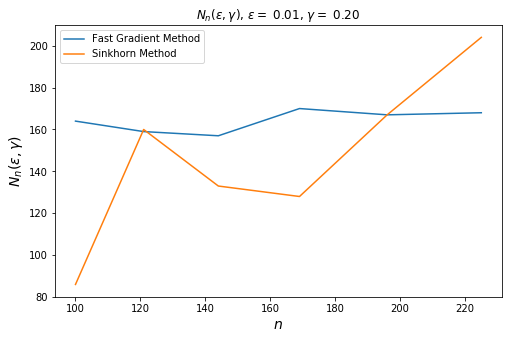

In [10]:
epsilon = 0.01
gamma = 0.2

epsilons, gammas, iterations = Experiments.test(problems, 
                                                config={'eps': (epsilon, epsilon, 1), 
                                                        'gamma': (gamma, gamma, 1)},
                                                methods=[fastgrad, sinkhorn])

plt.figure(figsize=(8, 5))
plt.title("$N_n(\epsilon, \gamma)$, $\epsilon = $ %.2f, $\gamma = $ %.2f" % (epsilon, gamma))
plt.xlabel("$n$", fontsize=14)
plt.ylabel("$N_n(\epsilon, \gamma)$", fontsize=14)

for i in range(2):
    plt.plot([p[0].shape[0] for p in problems], iterations[0, i, :, 0])

plt.legend(["Fast Gradient Method", "Sinkhorn Method"])